In [1]:
import pandas as pd
from haversine import haversine
import geopandas as gpd
import numpy as np
from scipy.stats.mstats import gmean
import folium as g
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
#시각화용
fp = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/국적별_외국인_현황_20220518202613.xlsx')
#최단거리 계산용
fp1 = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/5-2한눈에보는경남-시군별인구-2021년도하반기주민등록인구통계표.xlsx',sheets = '1.시군별세대및인구')
#점수계산용
fp2 = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/외국인거주자주.xlsx')
eo = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/행정안전부_읍면동 하부행정기관 현황_12_31_2020-2.xlsx')
eo1 = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/행정안전부_읍면동 하부행정기관 현황_12_31_20201-2.xlsx')
fw = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/외국인근로자 지원센터 현황(2019년)1..xlsx')
fac = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/경상남도_제조업 현황 정리.xlsx')
ch = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/시군청 주소11.xlsx')
road = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/경상남도_최단거리_지번,도로명.xlsx')
ff = pd.read_excel('/Users/home/Desktop/외국인 행정 경진대회/국적별 외국인.xlsx')

In [2]:
fac

,회사명,공장대표주소,lon,lat
0,신진에스엠,경상남도 창원시 마산회원구 봉암동 471-10 번지,128.598195,35.219108
1,(주)우일 E.R.S,경상남도 의령군 봉수면 한지18길 8 (주식회사정산플륨),128.302662,35.465365
2,YSM,경상남도 함안군 법수면 윤외리 1555번지,128.366261,35.313459
3,농업회사법인(주)대한농수산,경상남도 밀양시 삼랑진읍 삼랑진로 537-22,128.807794,35.408281
4,대흥중자,경상남도 함안군 칠서면 함의로 209-40 (대흥중자) (총 2 필지),128.488578,35.307688
...,...,...,...,...
19228,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",128.663762,35.205597
19229,힐중공업(주) 2공장,경상남도 밀양시 무안면 중산리 876번지 외 1필지,128.615993,35.470453
19230,힐중공업(주)1공장,경상남도 밀양시 무안면 중산리 890번지,128.616720,35.471074
19231,힘멜테크,"경상남도 창원시 성산구 완암로 50, 테크동 9층 913 (성산동, SK테크노파크)",128.663762,35.205597


In [3]:
fp = fp.drop(fp[fp['성별(1)']=='성별(1)'].index)
fp = fp.drop(fp[fp['행정구역(시군)별(1)']=='전체'].index)
fp['2021.2/2'] = fp['2021.2/2'].astype('float')

fp1 = fp1.rename(columns={'1. 시ㆍ군별 세대 및 인구':'행정구역','Unnamed: 1':'시군별인구','Unnamed: 8':'시군별외국인'})
fp1 = fp1.drop([0,1,2,3,4,5],axis=0)
fp1['대비인구'] = fp1['시군별외국인']/fp1['시군별인구']
fp1 = fp1[['행정구역','대비인구']]

fp2 = fp2.rename(columns={'읍면동':'지번'})
#fp2 = fp2['외국인'].astype('float')
fp2['대비인구'] = fp2['외국인']/fp2['합계']
fp2 = fp2[['지번','대비인구']]

eo = eo[eo['시도']=='경남']
eo['주소'] = eo['주    소']
eo['시군구'] =eo['시군구'].str[0:3]
eo = eo[['시도','시군구','읍면동','주소']]

fw = fw[fw['비고']== '고용노동부 운영']
fw = fw[['소재지','비고','센터명','lon','lat']]
fw = fw.rename(columns={'소재지':'대표주소'})
#fw['주소'] = fw['대표주소'].str[0:8]


eo1 = eo1.rename(columns={'a2':'주소'})
eo1_1 = pd.merge(eo,eo1,on='주소',how='left')

ch = ch.rename(columns={'시청.주소':'대표주소'})

road = road.rename(columns={'도로명':'주소'})
road = road[['지번','주소']]

fac['주소'] = fac['공장대표주소'].str[5:8]
df33 = fac.groupby(['주소'],as_index=False).count()
df33 = df33.rename(columns={'주소':'행정구역','회사명':'공장수'})
df33 = df33[['행정구역','공장수']]

dro = pd.merge(fp1,df33,on='행정구역',how='left')
dro = dro.sort_values('행정구역',ascending=True)
dro = dro.drop_duplicates()
dro = dro.dropna()

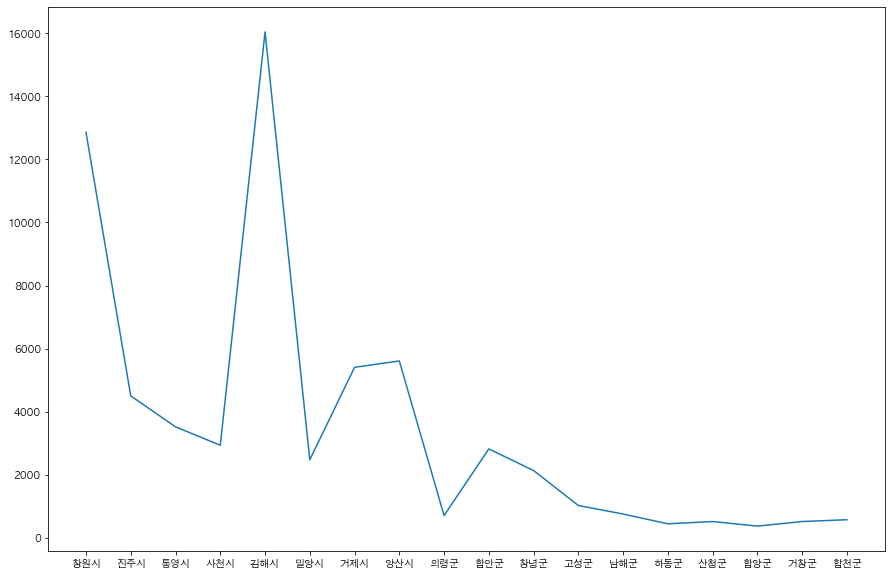

In [4]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,10))

plt.plot(fp['행정구역(시군)별(1)'],fp['2021.2/2'])
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

# 세가지 feature를 대상
data = dro[['대비인구','공장수']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

/Users/home/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3815c72b0>,
                 estimator=KMeans(n_clusters=9), k=None)

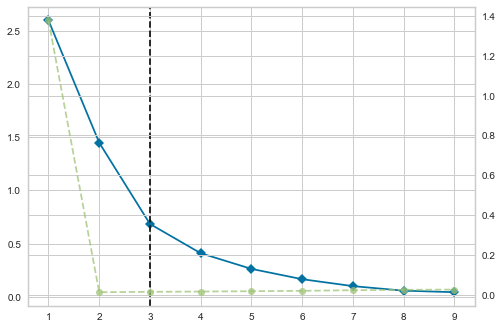

In [6]:
# 엘보우를 통한 최적의 군집수 계산
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [7]:

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
dro['cluster'] = model.fit_predict(data_scale)

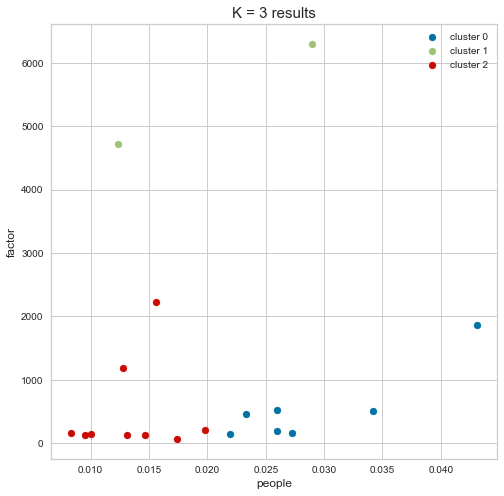

In [8]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(dro.loc[dro['cluster'] == i, '대비인구'], dro.loc[dro['cluster'] == i,'공장수'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('people', size = 12)
plt.ylabel('factor', size = 12)
#plt.xlim(0,1)
#plt.ylim(0,2000)
plt.show()

In [9]:
dro = dro[dro['cluster']==0]

In [10]:
new_eo = eo1_1[eo1_1['시군구']=='거제시']
for i in dro['행정구역']:
    new_eo = pd.concat([new_eo,eo1_1[eo1_1['시군구']==i]],ignore_index = True)
    
new_eo1 = eo1_1[eo1_1['시군구']=='거제시']
for i in dro['행정구역']:
    new_eo1 = pd.concat([new_eo1,eo1_1[eo1_1['시군구']==i]],ignore_index = True)


fac['시군구'] = fac['공장대표주소'].str[5:8]
new_fac = fac[fac['시군구']=='거제시']
for i in dro['행정구역']:
    new_fac = pd.concat([new_fac,fac[fac['시군구']==i]],ignore_index = True)
#new_df3 = new_df3.rename(columns={'공장대표주소':'대표주소'})

In [11]:
dro

,행정구역,대비인구,공장수,cluster
11,거제시,0.0219123,145.0,0
10,밀양시,0.023303,466.0,0
8,사천시,0.0259733,515.0,0
14,의령군,0.0259769,190.0,0
16,창녕군,0.0342119,510.0,0
7,통영시,0.0272772,152.0,0
15,함안군,0.0430825,1859.0,0


In [12]:
re_location = gpd.GeoDataFrame(new_eo, geometry=gpd.points_from_xy(new_eo.lon, new_eo.lat), crs='epsg:4326')
dr_location = gpd.GeoDataFrame(fw, geometry=gpd.points_from_xy(fw.lon, fw.lat), crs='epsg:4326')

def location(lo):
    distances =  dr_location.to_crs(epsg=5186).geometry.distance(lo)
    loc = dr_location.iloc[distances.idxmin()]['대표주소']
    return loc
re_location['대표주소'] = re_location.to_crs(epsg=5186).apply(lambda x: location(x.geometry), axis=1)

In [13]:
re_location

,시도,시군구,읍면동,주소,lon,lat,geometry,대표주소
0,경남,거제시,일운면사무소,경상남도 거제시 일운면 지세포4길 7,128.703039,34.829771,POINT (128.70304 34.82977),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"
1,경남,거제시,동부면사무소,경상남도 거제시 동부면 동부로 16,128.607986,34.821813,POINT (128.60799 34.82181),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"
2,경남,거제시,남부면사무소,경상남도 거제시 남부면 남부해안로 30,128.610141,34.732166,POINT (128.61014 34.73217),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"
3,경남,거제시,거제면사무소,경상남도 거제시 거제면 서상길 1,128.590593,34.851218,POINT (128.59059 34.85122),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"
4,경남,거제시,둔덕면사무소,경상남도 거제시 둔덕면 거제남서로 4620,128.505448,34.836964,POINT (128.50545 34.83696),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"
...,...,...,...,...,...,...,...,...
113,경남,함안군,대산면사무소,경상남도 함안군 대산면 대산중앙로 176,128.431822,35.349984,POINT (128.43182 35.34998),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"
114,경남,함안군,칠서면사무소,경상남도 함안군 칠서면 청계2길 35,128.498282,35.333228,POINT (128.49828 35.33323),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"
115,경남,함안군,칠북면사무소,경상남도 함안군 칠북면 칠북로 32,128.521854,35.346839,POINT (128.52185 35.34684),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"
116,경남,함안군,산인면사무소,경상남도 함안군 산인면 가야로 211,128.424328,35.279379,POINT (128.42433 35.27938),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층"


In [14]:
dis = pd.merge(re_location,dr_location,on='대표주소',how='left')

In [15]:
dis

,시도,시군구,읍면동,주소,lon_x,lat_x,geometry_x,대표주소,비고,센터명,lon_y,lat_y,geometry_y
0,경남,거제시,일운면사무소,경상남도 거제시 일운면 지세포4길 7,128.703039,34.829771,POINT (128.70304 34.82977),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)
1,경남,거제시,동부면사무소,경상남도 거제시 동부면 동부로 16,128.607986,34.821813,POINT (128.60799 34.82181),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)
2,경남,거제시,남부면사무소,경상남도 거제시 남부면 남부해안로 30,128.610141,34.732166,POINT (128.61014 34.73217),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)
3,경남,거제시,거제면사무소,경상남도 거제시 거제면 서상길 1,128.590593,34.851218,POINT (128.59059 34.85122),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)
4,경남,거제시,둔덕면사무소,경상남도 거제시 둔덕면 거제남서로 4620,128.505448,34.836964,POINT (128.50545 34.83696),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,경남,함안군,대산면사무소,경상남도 함안군 대산면 대산중앙로 176,128.431822,35.349984,POINT (128.43182 35.34998),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)
114,경남,함안군,칠서면사무소,경상남도 함안군 칠서면 청계2길 35,128.498282,35.333228,POINT (128.49828 35.33323),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)
115,경남,함안군,칠북면사무소,경상남도 함안군 칠북면 칠북로 32,128.521854,35.346839,POINT (128.52185 35.34684),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)
116,경남,함안군,산인면사무소,경상남도 함안군 산인면 가야로 211,128.424328,35.279379,POINT (128.42433 35.27938),"경상남도 창원시 마산합포구 3ㆍ15대로 203, 1층",고용노동부 운영,창원외국인노동자지원센터,128.567885,35.196911,POINT (128.56789 35.19691)


In [16]:
from haversine import haversine
li = []

dis['lon_x'] = dis['lon_x'].astype('float')
dis['lat_x'] = dis['lat_x'].astype('float')
dis['lon_y'] = dis['lon_y'].astype('float')
dis['lat_y'] = dis['lat_y'].astype('float')

for i in range(dis.shape[0]):
    hbl = (dis['lon_x'][i],dis['lat_x'][i])
    hcl = (dis['lon_y'][i],dis['lat_y'][i])
    result = haversine(hbl,hcl,unit='km')
    li.append(result)

In [17]:
re_location['최단거리'] = li
new_eo2 = re_location[['주소','읍면동','시군구','최단거리']]
new_eo2 = new_eo2.sort_values('시군구',ascending=False)

In [18]:
new_eo2 = new_eo2[new_eo2['최단거리']>=30].sort_values('최단거리',ascending=True)
new_eo2

,주소,읍면동,시군구,최단거리
107,경상남도 통영시 도남로 185,봉평동행정복지센터,통영시,30.018521
98,경상남도 통영시 한산면 한산일주로 844,황산면사무소,통영시,30.521987
95,경상남도 통영시 도산면 도산일주로 30-2,도산면사무소,통영시,30.638608
83,경상남도 창녕군 대합면 도장골길 5,대합면사무소,창녕군,30.736696
100,경상남도 통영시 평인일주로 36,도천동행정복지센터,통영시,30.939706
82,경상남도 창녕군 성산면 이천길 6,성산면사무소,창녕군,31.018886
106,경상남도 통영시 미수해안로 51-1,미수동주민센터,통영시,31.142493
71,경상남도 의령군 용덕면 용암로1길 4,용덕면사무소,의령군,32.466854
2,경상남도 거제시 남부면 남부해안로 30,남부면사무소,거제시,32.573329
20,경상남도 거제시 남부면 남부해안로 30,남부면사무소,거제시,32.573329


In [19]:
ch

,지점명,대표주소,lon,lat
0,통영시,경상남도 통영시 통영해안로 515,128.434040,34.853937
1,창녕군,경상남도 창녕군 창녕읍 군청길 1,128.492260,35.544607
2,의령군,경상남도 의령군 의령읍 충익로 63,128.261388,35.321605
3,거제시,경상남도 거제시 계룡로 125,128.621847,34.880906
4,밀양시,경상남도 밀양시 밀양대로 2047,128.747229,35.503847
5,사천시,경상남도 사천시 용현면 시청로 77,128.064228,35.003354


In [20]:
re_location1 = gpd.GeoDataFrame(new_eo1, geometry=gpd.points_from_xy(new_eo1.lon, new_eo1.lat), crs='epsg:4326')
dr_location1 = gpd.GeoDataFrame(ch, geometry=gpd.points_from_xy(ch.lon, ch.lat), crs='epsg:4326')

def location(lo):
    distances =  dr_location1.to_crs(epsg=5186).geometry.distance(lo)
    loc = dr_location1.iloc[distances.idxmin()]['대표주소']
    return loc
re_location1['대표주소'] = re_location1.to_crs(epsg=5186).apply(lambda x: location(x.geometry), axis=1)

In [21]:
re_location1

,시도,시군구,읍면동,주소,lon,lat,geometry,대표주소
0,경남,거제시,일운면사무소,경상남도 거제시 일운면 지세포4길 7,128.703039,34.829771,POINT (128.70304 34.82977),경상남도 거제시 계룡로 125
1,경남,거제시,동부면사무소,경상남도 거제시 동부면 동부로 16,128.607986,34.821813,POINT (128.60799 34.82181),경상남도 거제시 계룡로 125
2,경남,거제시,남부면사무소,경상남도 거제시 남부면 남부해안로 30,128.610141,34.732166,POINT (128.61014 34.73217),경상남도 거제시 계룡로 125
3,경남,거제시,거제면사무소,경상남도 거제시 거제면 서상길 1,128.590593,34.851218,POINT (128.59059 34.85122),경상남도 거제시 계룡로 125
4,경남,거제시,둔덕면사무소,경상남도 거제시 둔덕면 거제남서로 4620,128.505448,34.836964,POINT (128.50545 34.83696),경상남도 통영시 통영해안로 515
...,...,...,...,...,...,...,...,...
113,경남,함안군,대산면사무소,경상남도 함안군 대산면 대산중앙로 176,128.431822,35.349984,POINT (128.43182 35.34998),경상남도 의령군 의령읍 충익로 63
114,경남,함안군,칠서면사무소,경상남도 함안군 칠서면 청계2길 35,128.498282,35.333228,POINT (128.49828 35.33323),경상남도 의령군 의령읍 충익로 63
115,경남,함안군,칠북면사무소,경상남도 함안군 칠북면 칠북로 32,128.521854,35.346839,POINT (128.52185 35.34684),경상남도 창녕군 창녕읍 군청길 1
116,경남,함안군,산인면사무소,경상남도 함안군 산인면 가야로 211,128.424328,35.279379,POINT (128.42433 35.27938),경상남도 의령군 의령읍 충익로 63


In [22]:
dis1 = pd.merge(re_location1,dr_location1,on='대표주소',how='left')
dis1

,시도,시군구,읍면동,주소,lon_x,lat_x,geometry_x,대표주소,지점명,lon_y,lat_y,geometry_y
0,경남,거제시,일운면사무소,경상남도 거제시 일운면 지세포4길 7,128.703039,34.829771,POINT (128.70304 34.82977),경상남도 거제시 계룡로 125,거제시,128.621847,34.880906,POINT (128.62185 34.88091)
1,경남,거제시,동부면사무소,경상남도 거제시 동부면 동부로 16,128.607986,34.821813,POINT (128.60799 34.82181),경상남도 거제시 계룡로 125,거제시,128.621847,34.880906,POINT (128.62185 34.88091)
2,경남,거제시,남부면사무소,경상남도 거제시 남부면 남부해안로 30,128.610141,34.732166,POINT (128.61014 34.73217),경상남도 거제시 계룡로 125,거제시,128.621847,34.880906,POINT (128.62185 34.88091)
3,경남,거제시,거제면사무소,경상남도 거제시 거제면 서상길 1,128.590593,34.851218,POINT (128.59059 34.85122),경상남도 거제시 계룡로 125,거제시,128.621847,34.880906,POINT (128.62185 34.88091)
4,경남,거제시,둔덕면사무소,경상남도 거제시 둔덕면 거제남서로 4620,128.505448,34.836964,POINT (128.50545 34.83696),경상남도 통영시 통영해안로 515,통영시,128.434040,34.853937,POINT (128.43404 34.85394)
...,...,...,...,...,...,...,...,...,...,...,...,...
113,경남,함안군,대산면사무소,경상남도 함안군 대산면 대산중앙로 176,128.431822,35.349984,POINT (128.43182 35.34998),경상남도 의령군 의령읍 충익로 63,의령군,128.261388,35.321605,POINT (128.26139 35.32160)
114,경남,함안군,칠서면사무소,경상남도 함안군 칠서면 청계2길 35,128.498282,35.333228,POINT (128.49828 35.33323),경상남도 의령군 의령읍 충익로 63,의령군,128.261388,35.321605,POINT (128.26139 35.32160)
115,경남,함안군,칠북면사무소,경상남도 함안군 칠북면 칠북로 32,128.521854,35.346839,POINT (128.52185 35.34684),경상남도 창녕군 창녕읍 군청길 1,창녕군,128.492260,35.544607,POINT (128.49226 35.54461)
116,경남,함안군,산인면사무소,경상남도 함안군 산인면 가야로 211,128.424328,35.279379,POINT (128.42433 35.27938),경상남도 의령군 의령읍 충익로 63,의령군,128.261388,35.321605,POINT (128.26139 35.32160)


In [23]:
from haversine import haversine
li = []

dis1['lon_x'] = dis1['lon_x'].astype('float')
dis1['lat_x'] = dis1['lat_x'].astype('float')
dis1['lon_y'] = dis1['lon_y'].astype('float')
dis1['lat_y'] = dis1['lat_y'].astype('float')

for i in range(dis1.shape[0]):
    hbl = (dis1['lon_x'][i],dis1['lat_x'][i])
    hcl = (dis1['lon_y'][i],dis1['lat_y'][i])
    result = haversine(hbl,hcl,unit='km')
    li.append(result)

In [24]:
re_location1['최단거리'] = li
new_eo2_1 = re_location1[['주소','읍면동','시군구','최단거리']]
new_eo2_1 = new_eo2_1.sort_values('시군구',ascending=False)

new_eo2_1.sort_values('최단거리',ascending=True)

,주소,읍면동,시군구,최단거리
66,경상남도 의령군 의령읍 의병로19길 15,의령읍행정복지센터,의령군,0.134921
15,경상남도 거제시 거제중앙로13길 24,고현동주민센터,거제시,0.222431
33,경상남도 거제시 거제중앙로13길 24,고현동주민센터,거제시,0.222431
105,경상남도 통영시 안개4길 53,무전동주민센터,통영시,0.289648
48,경상남도 밀양시 중앙로 425-4,내이동행정복지센터,밀양시,0.481254
...,...,...,...,...
117,경상남도 함안군 여항면 여항로 50,여항면사무소,함안군,20.713166
99,경상남도 통영시 사량면 상도일주로 1580-13,사량면사무소,통영시,23.827337
97,경상남도 통영시 욕지면 중촌길 193,욕지면사무소,통영시,24.177046
114,경상남도 함안군 칠서면 청계2길 35,칠서면사무소,함안군,26.353722


In [25]:
new_eoeo = pd.merge(new_eo2,new_eo2_1,on='주소',how='left')


In [26]:
new_eoeo = new_eoeo.rename(columns={'읍면동_x':'하부행정기관','시도_x':'시도','최단거리_x':'민원센터거리','최단거리_y':'시청거리'})
new_eoeo = pd.merge(new_eoeo,road,on='주소',how='left')
new_eoeo = new_eoeo[['하부행정기관','주소','지번','민원센터거리','시청거리']]
new_eoeo

,하부행정기관,주소,지번,민원센터거리,시청거리
0,봉평동행정복지센터,경상남도 통영시 도남로 185,봉평동,30.018521,1.998134
1,황산면사무소,경상남도 통영시 한산면 한산일주로 844,한산면,30.521987,10.132978
2,도산면사무소,경상남도 통영시 도산면 도산일주로 30-2,도산면,30.638608,8.736948
3,대합면사무소,경상남도 창녕군 대합면 도장골길 5,대합면,30.736696,5.245147
4,도천동행정복지센터,경상남도 통영시 평인일주로 36,도천동,30.939706,3.827207
5,성산면사무소,경상남도 창녕군 성산면 이천길 6,성산면,31.018886,5.824983
6,미수동주민센터,경상남도 통영시 미수해안로 51-1,미수동,31.142493,3.584975
7,용덕면사무소,경상남도 의령군 용덕면 용암로1길 4,용덕면,32.466854,3.806282
8,남부면사무소,경상남도 거제시 남부면 남부해안로 30,남부면,32.573329,10.403843
9,남부면사무소,경상남도 거제시 남부면 남부해안로 30,남부면,32.573329,10.403843


In [27]:
fp2

,지번,대비인구
0,북면,0.008277
1,대산면,0.004676
2,의창동,0.041347
3,팔룡동,0.004646
4,명곡동,0.027056
...,...,...
304,삼가면,0.005705
305,가회면,0.005650
306,대병면,0.014917
307,용주면,0.020669


In [28]:
new_eoeo = pd.merge(new_eoeo,fp2,on='지번',how='left')

In [29]:
new_eoeo = new_eoeo.drop_duplicates()

In [30]:
new_eoeo

,하부행정기관,주소,지번,민원센터거리,시청거리,대비인구
0,봉평동행정복지센터,경상남도 통영시 도남로 185,봉평동,30.018521,1.998134,0.016207
1,황산면사무소,경상남도 통영시 한산면 한산일주로 844,한산면,30.521987,10.132978,0.073239
2,도산면사무소,경상남도 통영시 도산면 도산일주로 30-2,도산면,30.638608,8.736948,0.026649
3,대합면사무소,경상남도 창녕군 대합면 도장골길 5,대합면,30.736696,5.245147,0.033172
4,도천동행정복지센터,경상남도 통영시 평인일주로 36,도천동,30.939706,3.827207,0.055628
5,성산면사무소,경상남도 창녕군 성산면 이천길 6,성산면,31.018886,5.824983,0.016871
6,미수동주민센터,경상남도 통영시 미수해안로 51-1,미수동,31.142493,3.584975,0.017338
7,용덕면사무소,경상남도 의령군 용덕면 용암로1길 4,용덕면,32.466854,3.806282,0.037628
8,남부면사무소,경상남도 거제시 남부면 남부해안로 30,남부면,32.573329,10.403843,0.036643
16,유곡면사무소,경상남도 의령군 유곡면 마장로 10,유곡면,32.665031,9.635984,0.003562


In [31]:
aa = new_eoeo['주소'].str[5:8].drop_duplicates()
aa

0     통영시
3     창녕군
7     의령군
8     거제시
19    밀양시
29    사천시
Name: 주소, dtype: object

In [32]:
ff1 = ff.T
ff1 = ff1.rename(columns={0:'통영시',1:'사천시',2:'밀양시',3:'거제시',4:'의령군',5:'창녕군'})
ff1 = ff1.drop(['행정구역(시군)별(1)'],axis=0)
ff1 = ff1.replace('-',0)

In [33]:
ff1 = ff1.sort_values('통영시',ascending=False)
ff2 = ff1.sort_values('사천시',ascending=False)
ff3 = ff1.sort_values('밀양시',ascending=False)
ff4 = ff1.sort_values('거제시',ascending=False)
ff5 = ff1.sort_values('의령군',ascending=False)
ff6 = ff1.sort_values('창녕군',ascending=False)

In [34]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel("/Users/home/Desktop/외국인 행정 경진대회/임시.xlsx", index_col =0)
data.reset_index(drop=True,inplace=True)
data

,하부행정기관,주소,지번,민원센터거리,시청거리,대비인구
0,봉평동행정복지센터,경상남도 통영시 도남로 185,봉평동,30.018521,1.998134,0.016207
1,황산면사무소,경상남도 통영시 한산면 한산일주로 844,한산면,30.521987,10.132978,0.073239
2,도산면사무소,경상남도 통영시 도산면 도산일주로 30-2,도산면,30.638608,8.736948,0.026649
3,대합면사무소,경상남도 창녕군 대합면 도장골길 5,대합면,30.736696,5.245147,0.033172
4,도천동행정복지센터,경상남도 통영시 평인일주로 36,도천동,30.939706,3.827207,0.055628
5,성산면사무소,경상남도 창녕군 성산면 이천길 6,성산면,31.018886,5.824983,0.016871
6,미수동주민센터,경상남도 통영시 미수해안로 51-1,미수동,31.142493,3.584975,0.017338
7,용덕면사무소,경상남도 의령군 용덕면 용암로1길 4,용덕면,32.466854,3.806282,0.037628
8,남부면사무소,경상남도 거제시 남부면 남부해안로 30,남부면,32.573329,10.403843,0.036643
9,유곡면사무소,경상남도 의령군 유곡면 마장로 10,유곡면,32.665031,9.635984,0.003562


(array([ 6., 11.,  3.,  7.,  1.,  4.,  1.,  2.,  2.,  1.]),
 array([0.00287139, 0.01187706, 0.02088274, 0.02988841, 0.03889408,
        0.04789975, 0.05690542, 0.0659111 , 0.07491677, 0.08392244,
        0.09292811]),
 <a list of 10 Patch objects>)

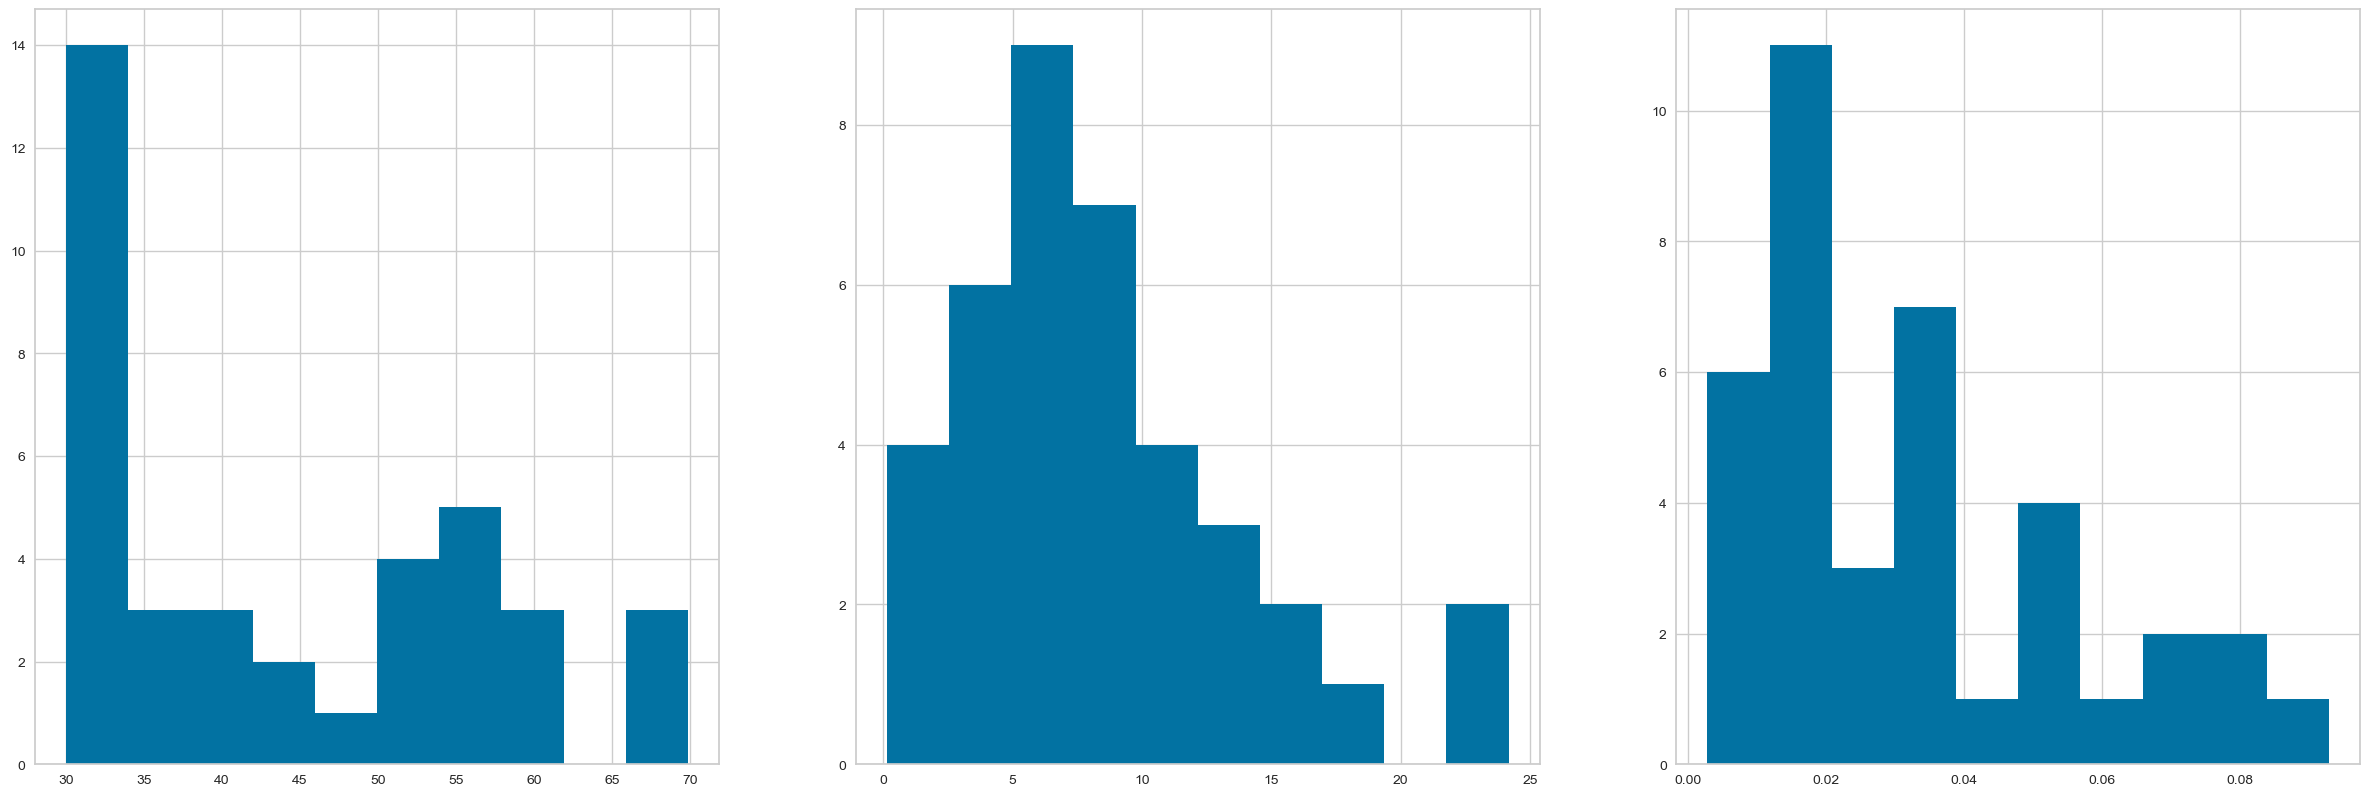

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,10), dpi=100)
ax1, ax2, ax3=fig.subplots(1,3)
ax1.hist(data.iloc[:,3]) # 2번 or 3번
ax2.hist(data.iloc[:,4]) # 1 or 2번
ax3.hist(data.iloc[:,5]) # 비율이니까 1번

In [36]:
def get_score(level, data):
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue 
    return score

In [37]:
# 민원센터거리 -> 동일한 간격으로
levels = []

for x in np.linspace(0,1,6)[1:-1]:
    levels.append(np.quantile(data.iloc[:,3],x))

score1 = get_score(levels, data.iloc[:,3])
score1 = np.array(score1)
levels

[32.50944425053268, 35.14695444941722, 49.499601339637586, 57.273056378319026]

In [38]:
# 시청거리 -> 최소값과 최대값 차이 크다
levels = []

for x in np.linspace(0,1,6)[1:-1]:
    levels.append(np.quantile(data.iloc[:,4],x))

score2 = get_score(levels, data.iloc[:,4])
score2 = np.array(score2)
levels

[3.814651884662017, 5.837096418120979, 8.745357197309724, 12.044469554547735]

In [39]:
# 민원센터거리 -> 동일한 간격으로
levels = []

for x in np.linspace(0,1,6)[1:-1]:
    levels.append(np.quantile(data.iloc[:,5],x))

score3 = get_score(levels, data.iloc[:,5])
score3 = np.array(score3)
levels

[0.0144960115198336,
 0.019431435029060987,
 0.03468466127034039,
 0.05359787130259136]

In [40]:
x = 0.5*score1 + 0.33 * score2 + 0.167*score3
data['score'] = x * 3
new_data = data.sort_values('score', ascending=False).reset_index(drop=True)
new_data

,하부행정기관,주소,지번,민원센터거리,시청거리,대비인구,score
0,곤양면행정복지센터,경상남도 사천시 곤양면 성내공원길 11,곤양면,68.308251,12.203482,0.092928,14.955
1,곤명면행정복지센터,경상남도 사천시 곤명면 원전새길 64,곤명면,69.866587,15.526721,0.037654,14.454
2,서포면행정복지센터,경상남도 사천시 서포면 자구로 465-17,서포면,66.895030,9.600356,0.019483,12.963
3,대의면사무소,경상남도 의령군 대의면 대의로 42,대의면,52.508779,17.369420,0.034195,12.453
4,사량면사무소,경상남도 통영시 사량면 상도일주로 1580-13,사량면,45.684363,23.827337,0.068735,11.955
5,욕지면사무소,경상남도 통영시 욕지면 중촌길 193,욕지면,51.426769,24.177046,0.019226,11.952
6,동서금동행정복지센터,경상남도 사천시 동금로 27(동금동),동서금동,57.406411,5.212835,0.045054,11.484
7,선구동행정복지센터,경상남도 사천시 각산로 22(선구동),선구동,58.120056,5.132141,0.048824,11.484
8,남양동행정복지센터,경상남도 사천시 임내안길 65(송포동),남양동,58.232111,2.824215,0.054906,10.995
9,궁류면사무소,경상남도 의령군 궁류면 궁류로 124,궁류면,39.465758,8.778993,0.064577,10.965


In [41]:
new_data = new_data[['하부행정기관','주소','score']]

In [42]:
new_data['주소'] = new_data['주소'].str[5:8]

In [43]:
new_data

,하부행정기관,주소,score
0,곤양면행정복지센터,사천시,14.955
1,곤명면행정복지센터,사천시,14.454
2,서포면행정복지센터,사천시,12.963
3,대의면사무소,의령군,12.453
4,사량면사무소,통영시,11.955
5,욕지면사무소,통영시,11.952
6,동서금동행정복지센터,사천시,11.484
7,선구동행정복지센터,사천시,11.484
8,남양동행정복지센터,사천시,10.995
9,궁류면사무소,의령군,10.965
